### Plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_results(run_name, is_temp=False):
    results = {}
    if is_temp:
        time_ranges = ['all','2d','5d','13d', 'noDS']
    else:
        time_ranges = ['all']
    for time_range in time_ranges:
        results[time_range] = pd.read_csv(run_name+'_'+time_range+'.csv')
    return results

def plot_training(results, title=None):
    time_ranges = results.keys()
    for time_range in time_ranges:
        plt.plot(results[time_range]['validation_f1_micro'], label=time_range)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Micro-F1 score')
    plt.title("Micro-F1 validation curve " + title)
    plt.show()
    return results

# write code to visualize the validation_f1_score for each time range in the last epoch

def plot_performance(results, title=None):
    plt.bar(range(len(results)), [results[key]['validation_f1_micro'].max() for key in results.keys()], align='center')
    plt.xticks(range(len(results)), list(results.keys()))
    # display value on top of each bar
    for i, v in enumerate([results[key]['validation_f1_micro'].max() for key in results.keys()]):
        plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
    # create another line plot for the number of samples in each time range
    # the plot should have the same x-axis as the bar plot
    # creating a twin Axes sharing the x-axis
    ax2 = plt.twinx()
    ax2.plot(range(len(results)), [results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()], color='red')
    plt.xticks(range(len(results)), list(results.keys()))

    # display value on top of each bar
    for i, v in enumerate([results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()]):
        plt.text(i - 0.1, v - 2, str(round(v, 3)),color="r")
    plt.legend(['Number of samples'])

    plt.ylabel('Micro-F1 score')
    plt.xlabel('Time range')
    plt.title("Best Micro-F1 score "+ title)
    plt.show()

# plot the total, cls and aux loss
def plot_loss(results, title=None):
    losses =  ['train_loss', 'train_loss_aux', 'train_loss_cls']
    for loss in losses:
        plt.plot(results["all"][loss], label=loss)
    plt.title("Losses"+ title)
    plt.legend()
    plt.show()

### Baseline experiments

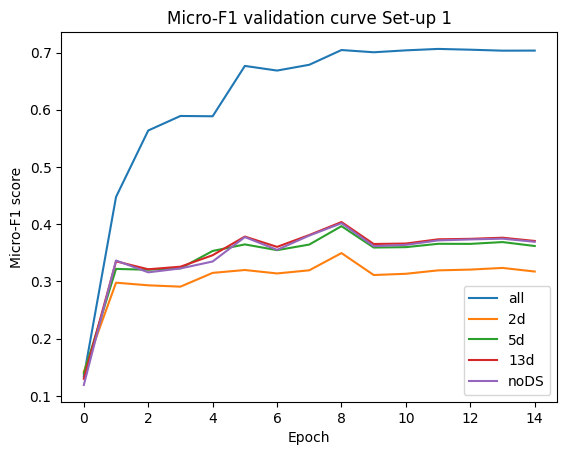

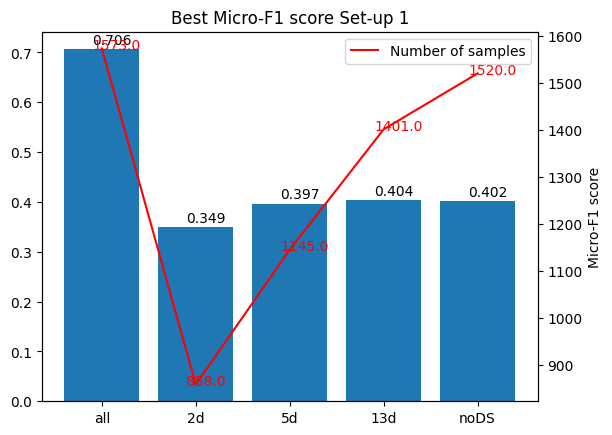

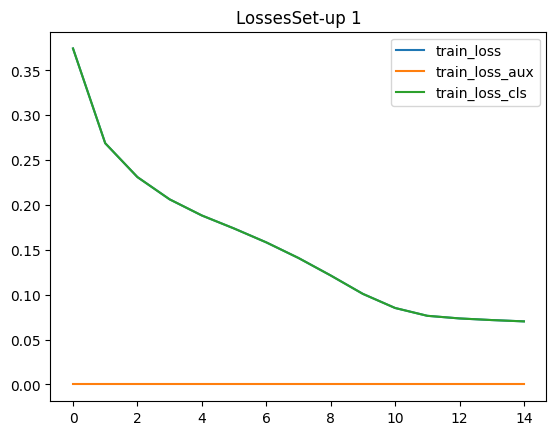

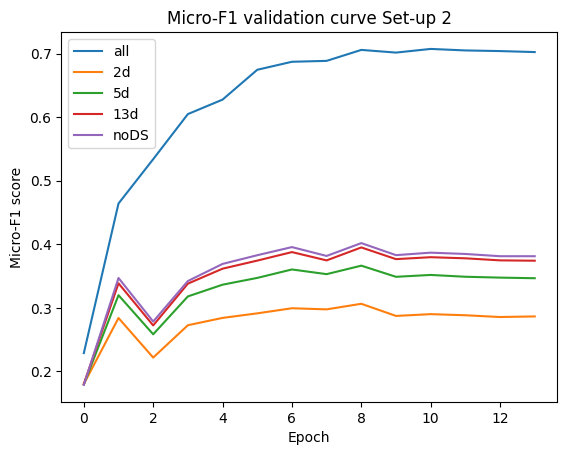

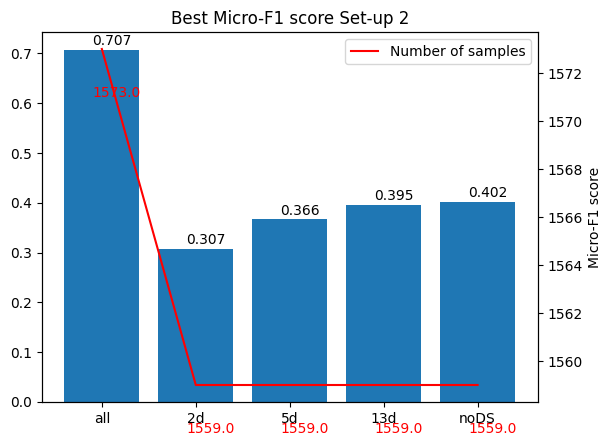

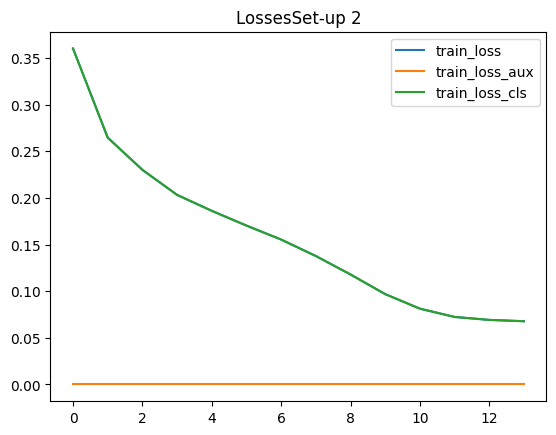

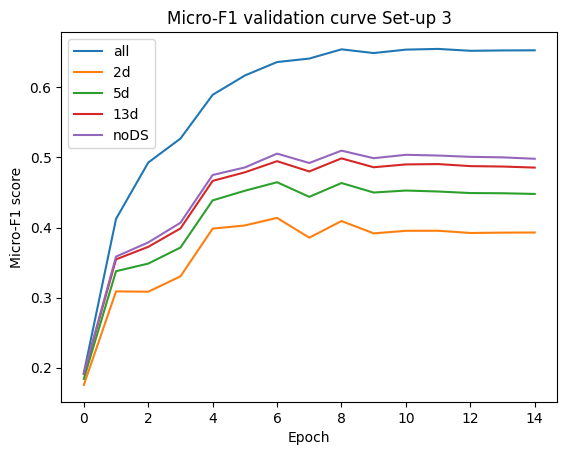

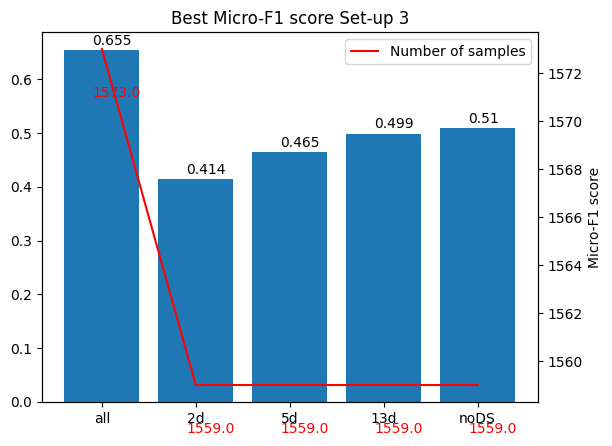

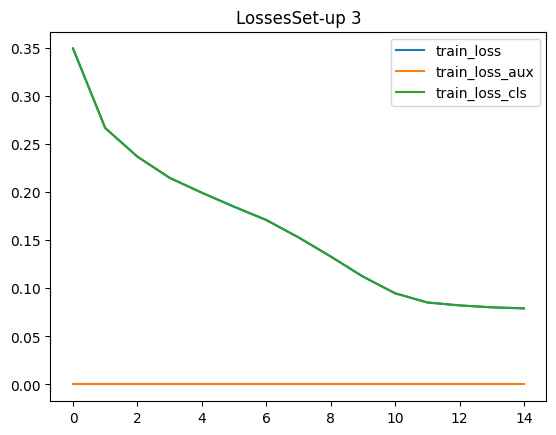

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
# test
run_names = [f"results/Final_MMULA_baseline_{i}" for i in range(1,4)]
results = [get_results(run_name, is_temp=True) for run_name in run_names]

for i, result in enumerate(results):
    plot_training(result, title=f"Set-up {i+1}")
    plot_performance(result, title=f"Set-up {i+1}")
    plot_loss(result, title=f"Set-up {i+1}")

### Baseline + AR

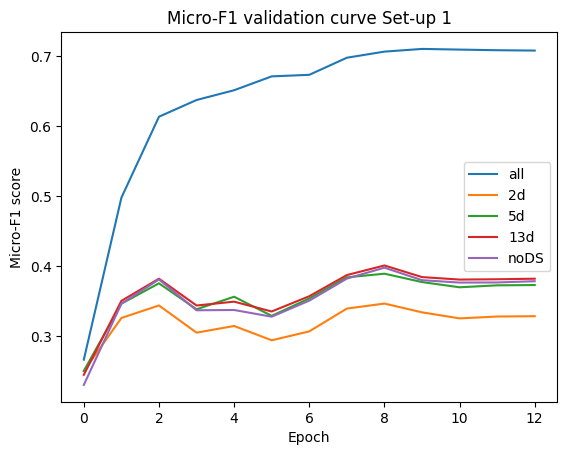

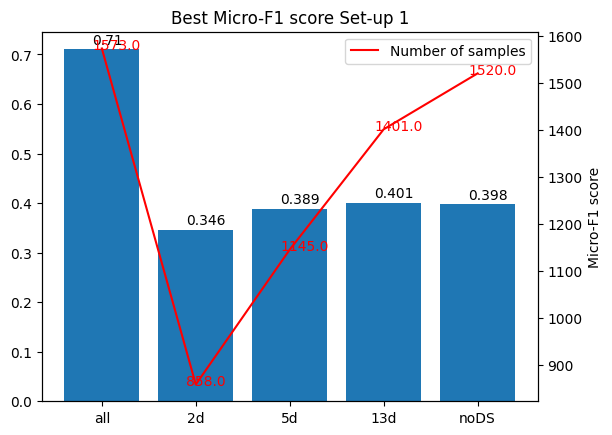

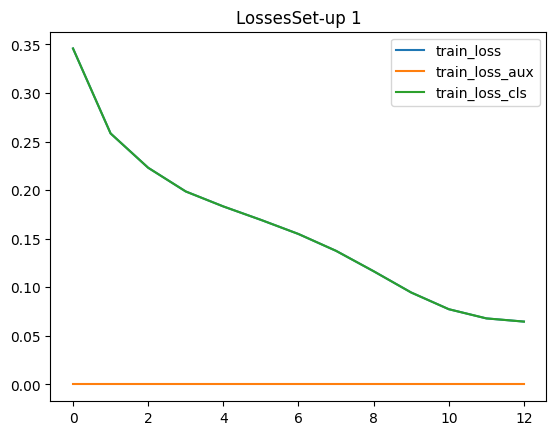

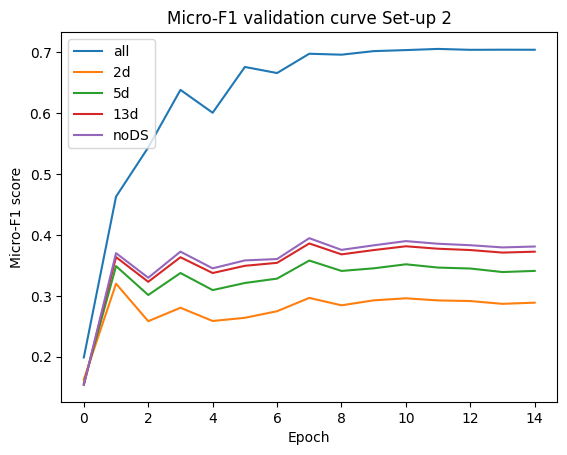

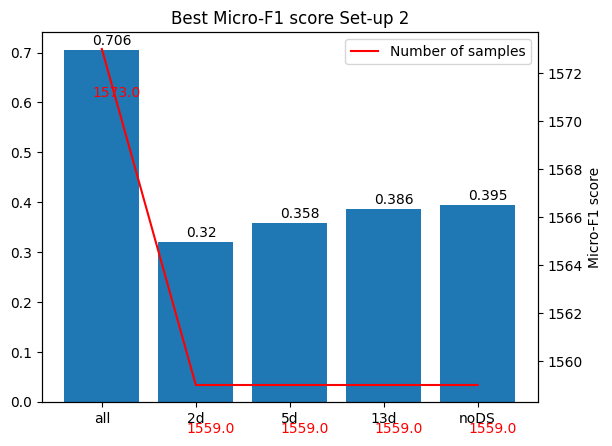

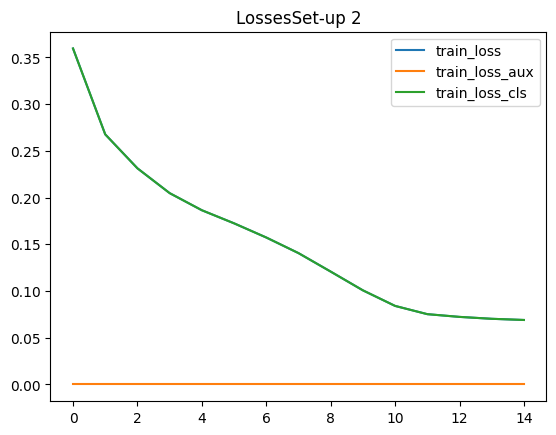

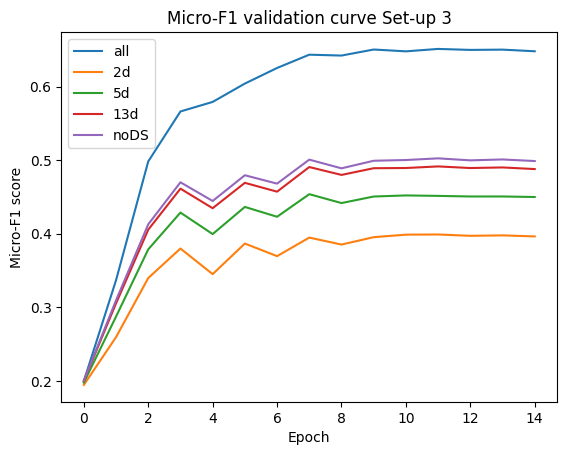

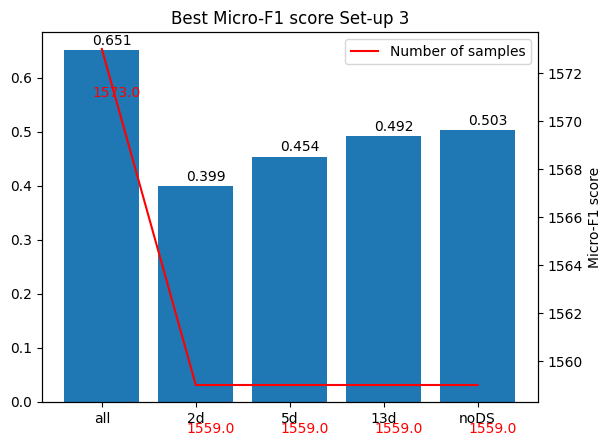

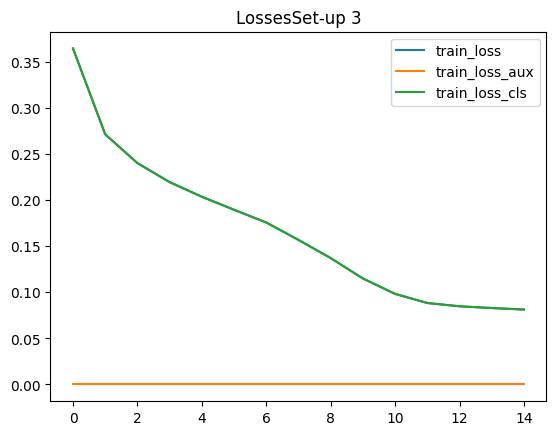

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
# test
run_names = [f"results/Final_MMULA_AR_{i}_v2" for i in range(1,4)]
results = [get_results(run_name, is_temp=True) for run_name in run_names]

for i, result in enumerate(results):
    plot_training(result, title=f"Set-up {i+1}")
    plot_performance(result, title=f"Set-up {i+1}")
    plot_loss(result, title=f"Set-up {i+1}")

### Baseline + DC

In [13]:
results[0]['all'].keys()
config_keys = [ 'run_name', 'project_path',
       'base_checkpoint', 'num_attention_heads', 'num_layers', 'lr',
       'max_chunks', 'grad_accumulation', 'use_positional_embeddings',
       'use_reverse_positional_embeddings', 'priority_mode', 'priority_idxs',
       'use_document_embeddings', 'use_reverse_document_embeddings',
       'use_category_embeddings', 'num_labels', 'use_all_tokens',
       'num_heads_labattn', 'final_aggregation', 'only_discharge_summary',
       'patience_threshold', 'max_epochs', 'save_model',
       'load_from_checkpoint', 'checkpoint_name', 'evaluate_temporal',
       'use_multihead_attention', 'debug', 'weight_aux', 'setup', 'limit_ds',
       'is_baseline', 'aux_task', 'apply_transformation', 'apply_weight',
       'reduce_computation', 'apply_temporal_loss', 'num_categories']
results_config = results[0]['all'][config_keys]

In [14]:
results_config

,run_name,project_path,base_checkpoint,num_attention_heads,num_layers,lr,max_chunks,grad_accumulation,use_positional_embeddings,use_reverse_positional_embeddings,...,weight_aux,setup,limit_ds,is_baseline,aux_task,apply_transformation,apply_weight,reduce_computation,apply_temporal_loss,num_categories
0,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0
1,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0
2,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0
3,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0
4,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0
5,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0
6,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0
7,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0
8,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0
9,Final_MMULA_DC_1,/vol/bitbucket/mh1022/temporal-modelling-icd,RoBERTa-base-PM-M3-Voc-hf,1.0,1.0,0.00005,16.0,16.0,True,True,...,0.1,latest,0.0,False,next_document_category,True,False,True,False,15.0


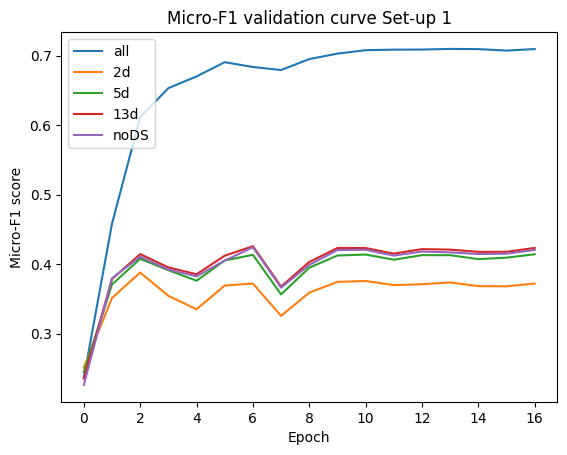

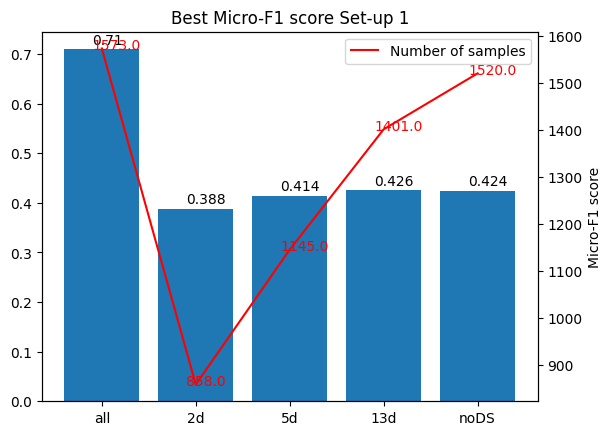

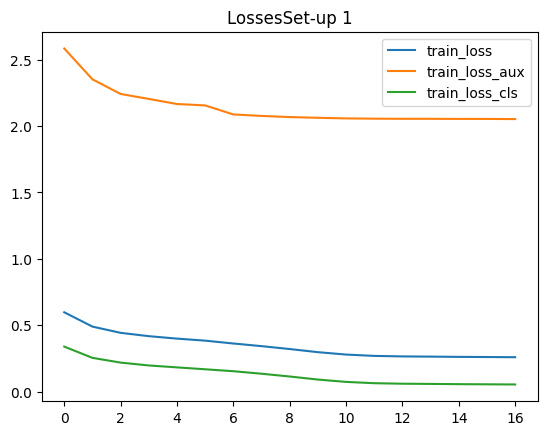

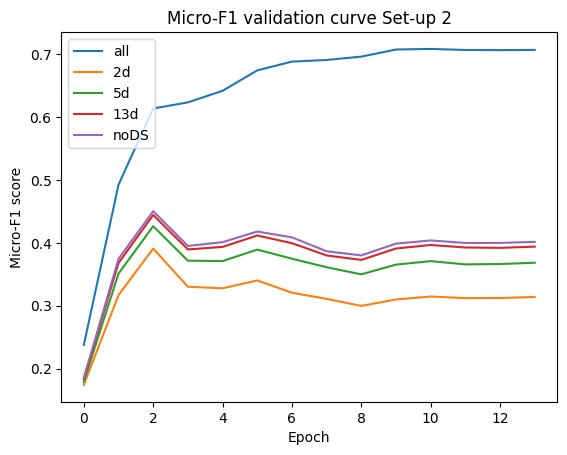

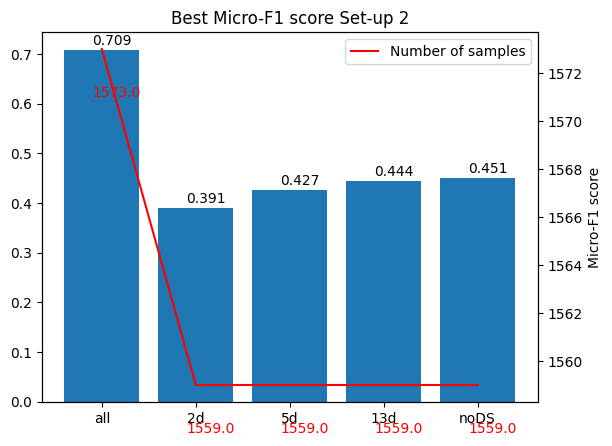

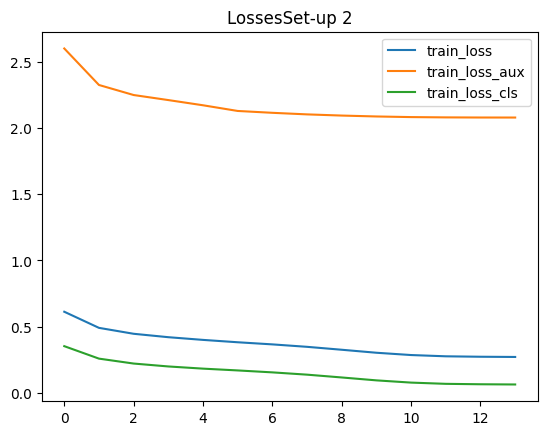

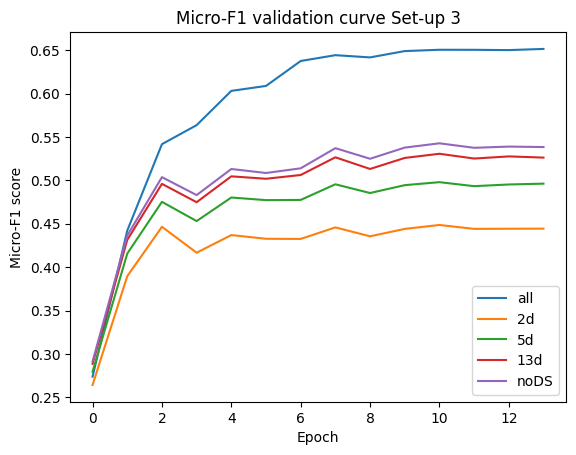

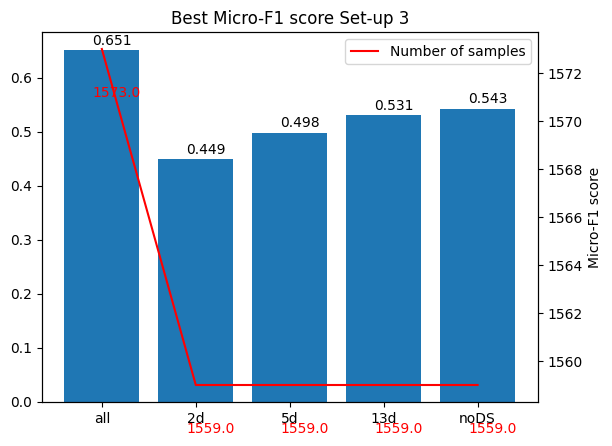

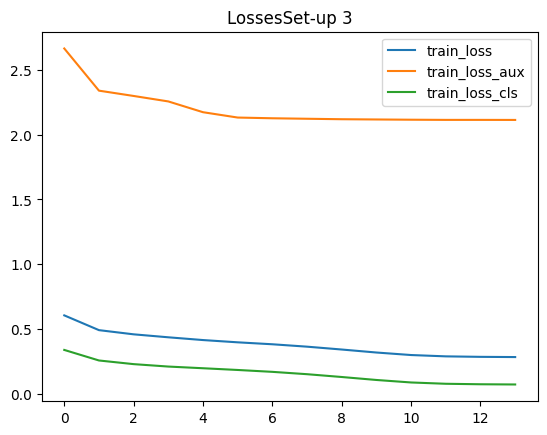

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
# test
run_names = [f"results/Final_MMULA_DC_{i}" for i in range(1,4)]
results = [get_results(run_name, is_temp=True) for run_name in run_names]

for i, result in enumerate(results):
    plot_training(result, title=f"Set-up {i+1}")
    plot_performance(result, title=f"Set-up {i+1}")
    plot_loss(result, title=f"Set-up {i+1}")

### Baseline + AR + DC (v2)

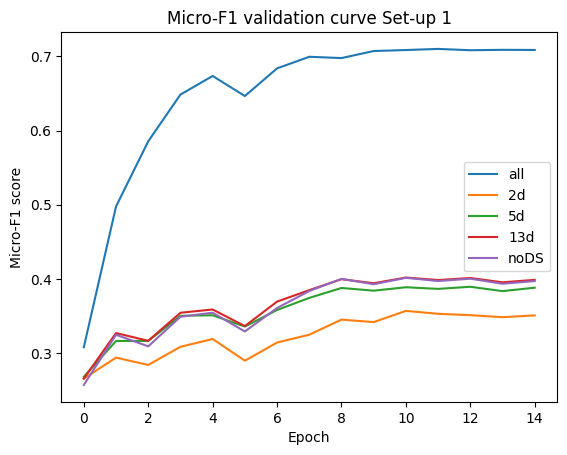

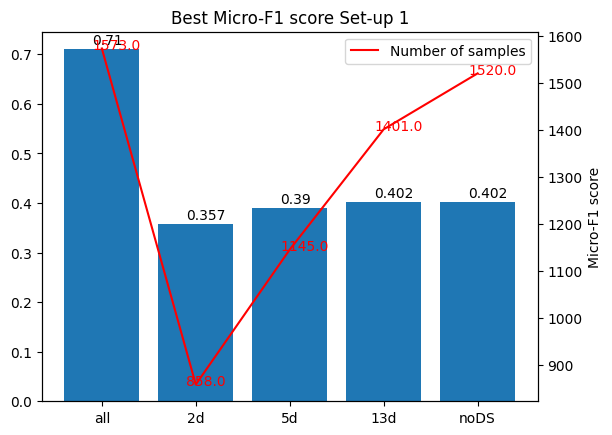

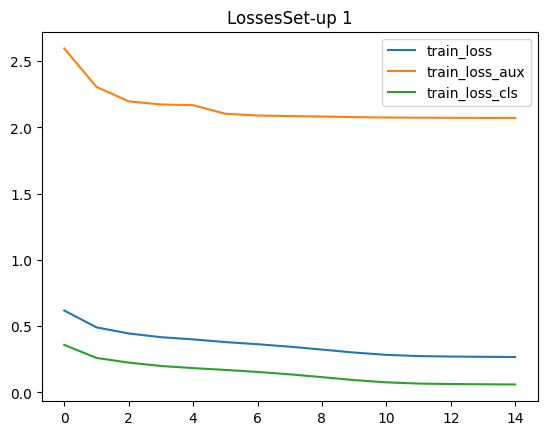

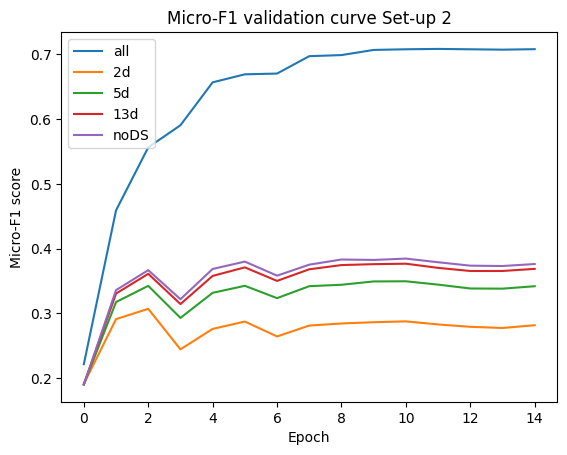

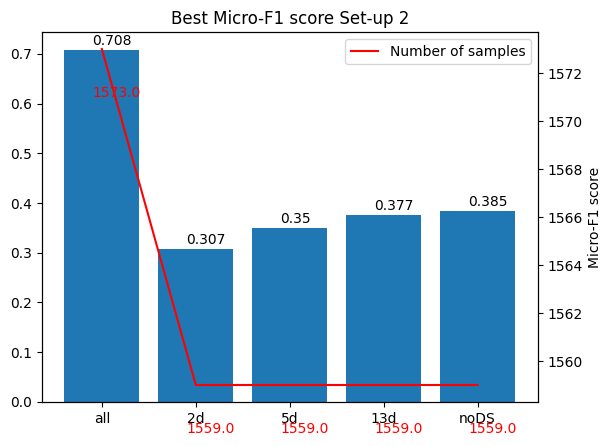

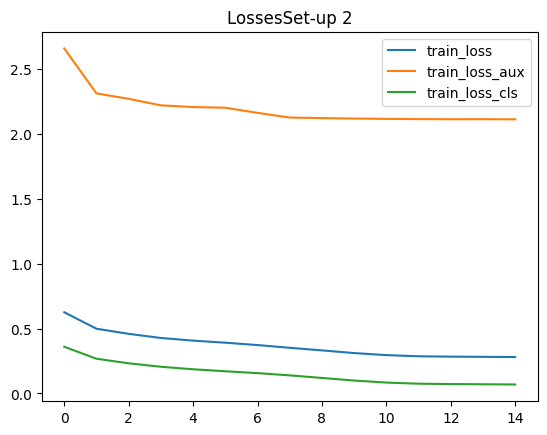

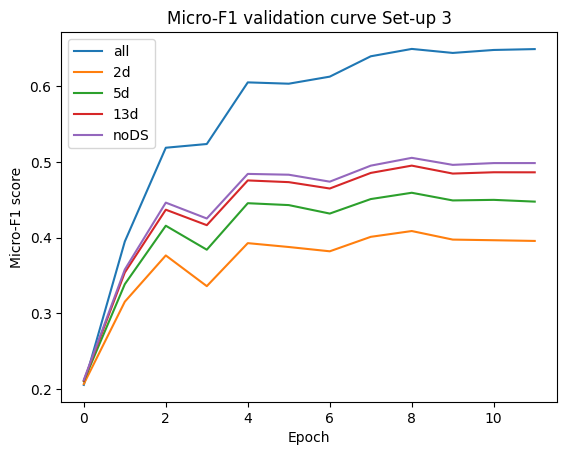

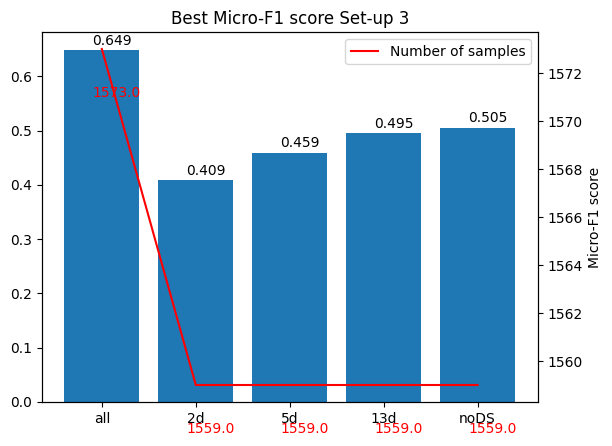

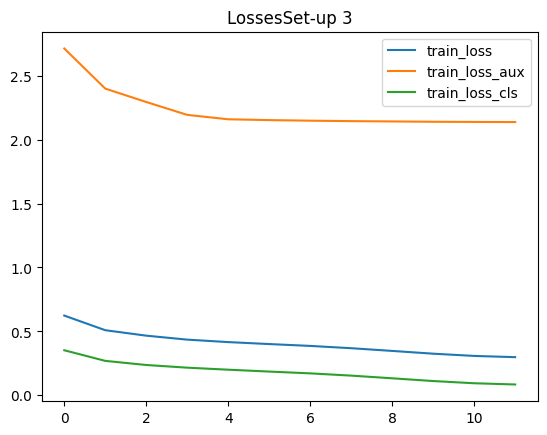

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
# test
run_names = [f"results/Final_MMULA_DC_{i}_v2" for i in range(1,4)]
results = [get_results(run_name, is_temp=True) for run_name in run_names]

for i, result in enumerate(results):
    plot_training(result, title=f"Set-up {i+1}")
    plot_performance(result, title=f"Set-up {i+1}")
    plot_loss(result, title=f"Set-up {i+1}")

### Baseline + AR + DE (transf)

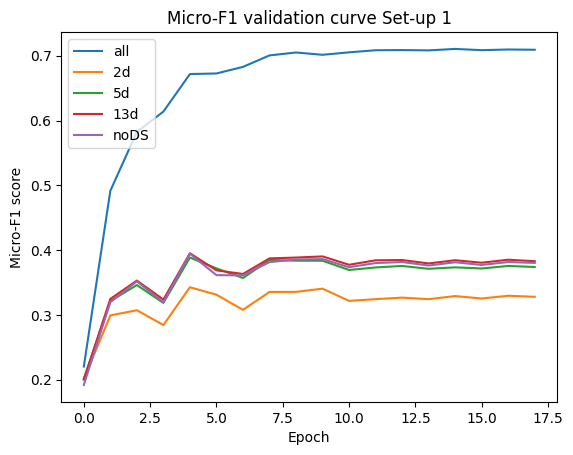

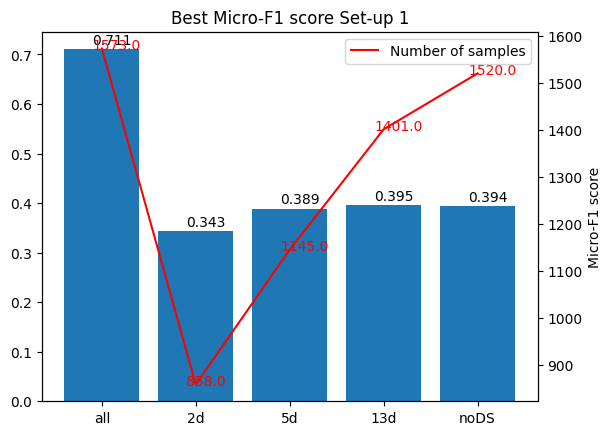

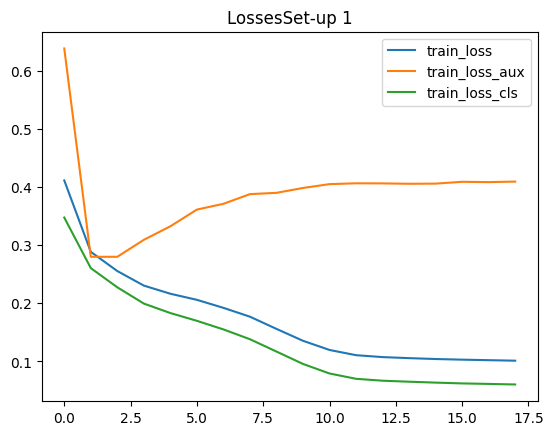

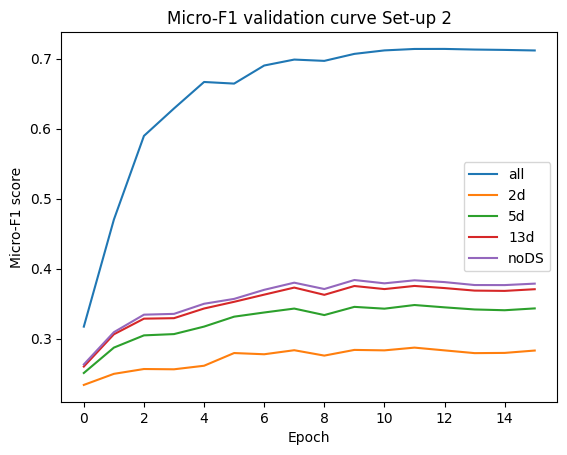

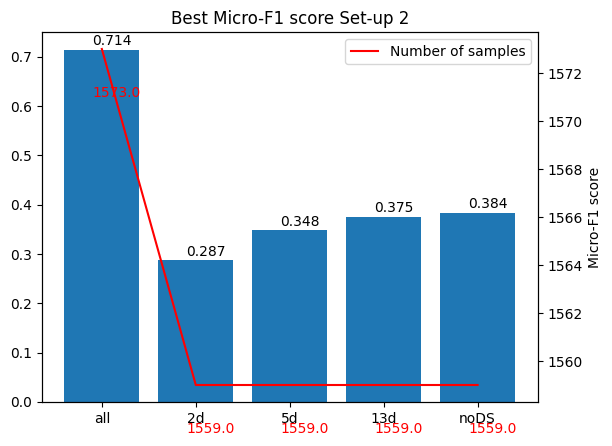

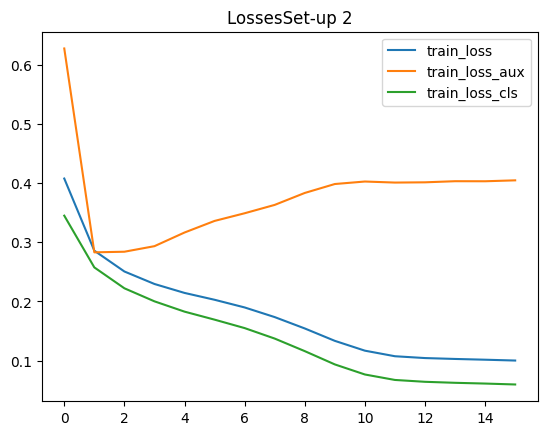

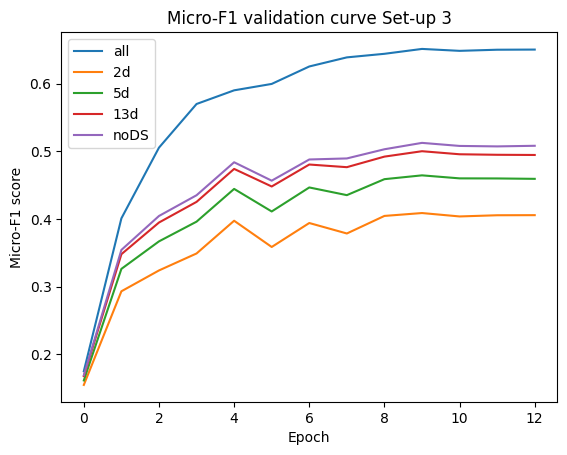

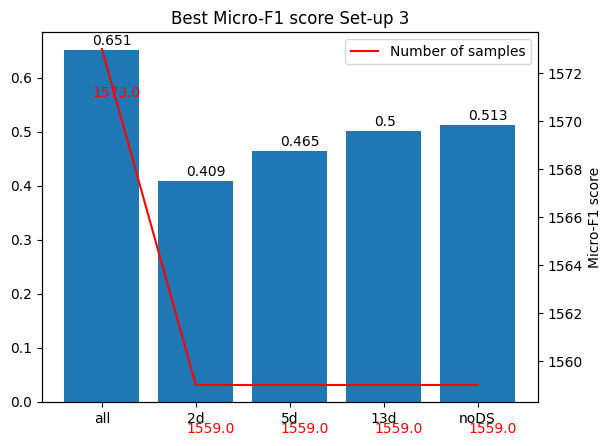

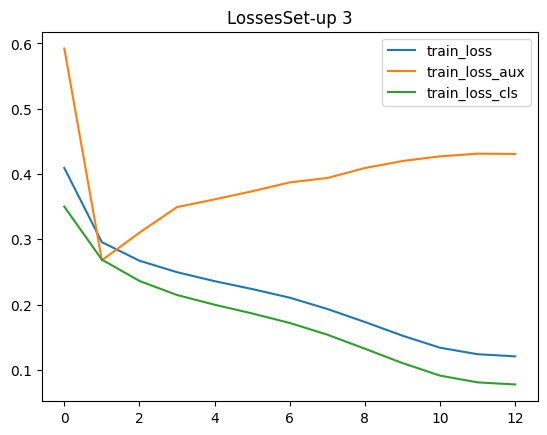

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
# test
run_names = [f"results/Final_MMULA_DE_transf_{i}" for i in range(1,4)]
results = [get_results(run_name, is_temp=True) for run_name in run_names]

for i, result in enumerate(results):
    plot_training(result, title=f"Set-up {i+1}")
    plot_performance(result, title=f"Set-up {i+1}")
    plot_loss(result, title=f"Set-up {i+1}")